<a href="https://colab.research.google.com/github/mechhector/visao_computacional20212/blob/main/trabalho1/q2__median_filter_DIP_20212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Informe a dimensão do kernel desejado:3
Informe o número de aplicações do filtro: 9
Conteúdo da imagem: lena
Padding? 1
Dimensões do Kernel: (3, 3)
Dimensões da Imagem: (256, 256)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


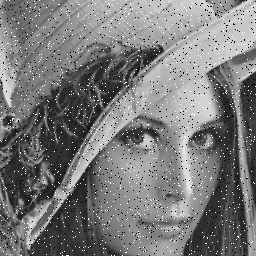

In [ ]:
# PDI 2021.2 Trabalho 1 
# Hector Leonardo Mota Moreira

import numpy as np
import cv2
import matplotlib.pyplot as plt 
import math as m
from google.colab.patches import cv2_imshow



# ========= Loading the image =========

img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/lena.png', 0)

# ========= Kernel Dimensions ========= 

k = int(input('Informe a dimensão do kernel desejado:'))

kernel_median = np.ones((k,k))

c = int (k/2) # Just do simplify; k is the kernel dimension (k x k)

# ======= Number of Iterations ======== 

n = int(input('Informe o número de aplicações do filtro: '))

# =========== Image Content =========== 

image_content = input('Conteúdo da imagem: ')

# ============== Padding ===============

padding = int(input('Padding? '))


print ('Dimensões do Kernel:', kernel_median.shape)

print ('Dimensões da Imagem:', img.shape)

print (kernel_median)
cv2_imshow(img)

(258, 258)


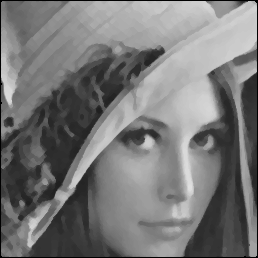

3 9


In [ ]:
# Padding

if padding == 1:

  line, column = (img.shape) 

  holdpdd = np.zeros( ((line + 2 * c), (column + 2 * c)) )  

  new_line, new_column = (holdpdd.shape)

  holdpdd [ c : new_line - c , c : new_column - c ] = img # Based on the Professor Navar's lecture.

  median_image = holdpdd.copy()
    
  print(holdpdd.shape)

  # Convolution

  for i in range(n): 
    for x in range(c,median_image.shape[0]-c):
      for y in range(c,median_image.shape[1]-c):
        
        lol = median_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
        
        median = np.median(lol*kernel_median)
          
        median_image [x,y] = m.ceil(median)

  # To remove padding

  final_image = np.zeros((img.shape[0] , img.shape[1]))

  final_image = median_image[ c : new_line - c , c : new_column - c ] 


# Without padding

else:

    median_image = img.copy()

    for i in range(n): 
      for x in range(c,median_image.shape[0]-c):
        for y in range(c,median_image.shape[1]-c):
          
          lol = median_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
          
          median = np.median(lol*kernel_median)
              
          median_image [x,y] = round(median)
    
    final_image = np.zeros((img.shape[0] , img.shape[1]))
    final_image = median_image

cv2_imshow(median_image)

print(k,n)

[[157. 155.   0.]
 [155.   0.   0.]
 [  0.   0.   0.]]
3 9


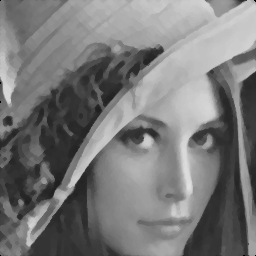

True

In [ ]:
print(lol)

print(k,n)

cv2_imshow(final_image)

file_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q2_Median_Filter/{}_k{}n{}pdd{}_median_filter.png'

cv2.imwrite(file_name.format(image_content,k,n,padding),final_image)

In [ ]:
print(img.shape, final_image.shape)

(256, 256) (256, 256)


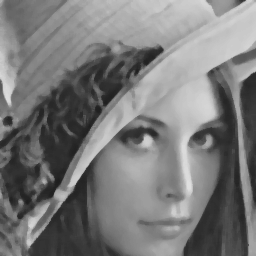

In [ ]:
# Using OpenCV

img_median = cv2.medianBlur(img, 5)

cv2_imshow(img_median)